# Random walk statistics

In [5]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [11]:
# Datasets
DATA = '../data'
WALK_LENGTH = 40
DATASETS = {
    'test_synth2': '/test_synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001',
    'synth2': '/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001',
    # 'rice_subset': '/rice_subset/rice_subset',  # takes a lot to render
    # 'synthetic_3layers': '/synthetic_3layers/synthetic_3layers_n500_Pred0.7_Phom0.025_Phet0.001', # color are not right
    # 'twitter': '/twitter/twitter',  # takes a lot to render
    # 'synth3': '/synth3/synthetic_3g_n500_Pred0.6_Pblue0.25_Prr0.025_Pbb0.025_Pgg0.025_Prb0.001_Prg0.0005_Pbg0.0005',
}

In [12]:
def parse_walks(dataset, embedding):
    walks = []
    filename = DATA + "/" + dataset  + "/" + dataset + '.embeddings_' + embedding + '.walks.0'
    with open(filename,  'r') as walk_file:
        for line in walk_file:
            walks.append([int(node_id) for node_id in line.split()])
    return walks

def parse_graph(dataset, embedding):
    graph = defaultdict(float)
    filename = DATA + "/" + dataset + "/" + dataset + '.embeddings_' + embedding + '.graph.out'
    with open(filename, 'r') as graph_file:
        for line in graph_file:
            from_, to_, weight = line.split()
            graph[(from_, to_)] = float(weight)
    return graph

def parse_node_properties(dataset):
    property_map = dict()
    with open(DATA + DATASETS[dataset] + '.attr', 'r') as attr_file:
        for line in attr_file:
            node_id, attr = line.split()
            property_map[int(node_id)] = attr
    return property_map

def plot_edges_histogram(dataset, embedding):
    G = parse_graph(dataset, embedding)
    edge_weights = np.array(list(G.values()))
    hist_array, bins = np.histogram(edge_weights, bins=25)
    plt.hist(bins[:-1], bins, weights=hist_array)
    plt.title(f'Edge weights distribution: {dataset} - {embedding}')
    plt.show()

def get_rw_statistics(dataset, embedding):
    walks = parse_walks(dataset, embedding)
    property_map = parse_node_properties(dataset)
    nodes_visited = []
    num_boundary_crossed = []
    for walk in walks:
        nodes_visited.append(len(np.unique(walk)))
        crossings = 0
        # when going from a to b, if prop_a != prop_b: boundary was crossed.
        for i in range(len(walk)-2):
            crossing_condition = property_map[walk[i]] != property_map[walk[i+1]]
            crossings += 1 if crossing_condition else 0
        num_boundary_crossed.append(crossings)
    avg_visited = np.round(np.mean(nodes_visited), 2)
    avg_crossing = np.round(np.mean(num_boundary_crossed), 2)
    print(f'Dataset: {dataset} - Embedding: {embedding}')
    print(f'Average number of nodes visited: {avg_visited} ({np.round(100*avg_visited/WALK_LENGTH, 2)}% of walk explored)')
    print(f'Average number of times boundary was crossed: {avg_crossing}\n')

In [16]:
print('Deepwalk')
get_rw_statistics('synth2', 'unweighted_d32_1')

print('CrossWalk Default RWs')
get_rw_statistics('synth2', 'soft_random_walk_5_bndry_0.5_exp_2.0_d32_1')
# get_rw_statistics('synth2', 'soft_random_walk_5_bndry_0.5_exp_4.0_d32_1')

print('CrossWalk Soft-self avoiding RWs')
get_rw_statistics('soft_test_synth2', 'random_walk_5_bndry_0.5_exp_2.0_d32_1')
# get_rw_statistics('test_synth2', 'random_walk_5_bndry_0.5_exp_4.0_d32_1')

Deepwalk
Dataset: synth2 - Embedding: unweighted_d32_1
Average number of nodes visited: 32.09 (80.23% of walk explored)
Average number of times boundary was crossed: 1.6

CrossWalk Default RWs
Dataset: synth2 - Embedding: soft_random_walk_5_bndry_0.5_exp_2.0_d32_1
Average number of nodes visited: 21.62 (54.05% of walk explored)
Average number of times boundary was crossed: 14.84

CrossWalk Soft-self avoiding RWs


FileNotFoundError: [Errno 2] No such file or directory: '../data/test_synth2/test_synth2.embeddings_soft_random_walk_5_bndry_0.5_exp_2.0_d32_1.walks.0'

In [15]:
for dataset in DATASETS:
    get_rw_statistics(dataset, 'unweighted_d32_1')
    get_rw_statistics(dataset, 'random_walk_5_bndry_0.5_exp_2.0_d32_1')
    get_rw_statistics(dataset, 'random_walk_5_bndry_0.5_exp_4.0_d32_1')
    print()

FileNotFoundError: [Errno 2] No such file or directory: '../data/test_synth2/test_synth2.embeddings_unweighted_d32_1.walks.0'

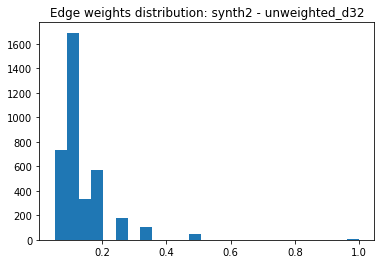

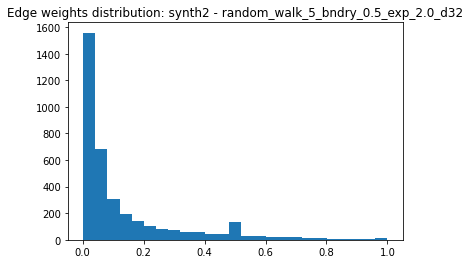

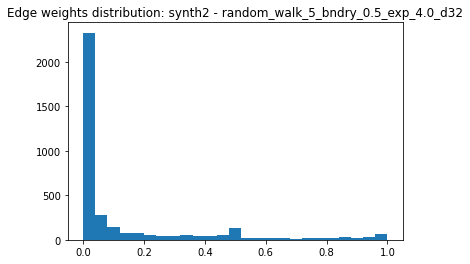

In [163]:
plot_edges_histogram('synth2', 'unweighted_d32_1')
plot_edges_histogram('synth2', 'random_walk_5_bndry_0.5_exp_2.0_d32_1')
plot_edges_histogram('synth2', 'random_walk_5_bndry_0.5_exp_4.0_d32_1')

In [25]:
from collections import defaultdict
from operator import itemgetter
d = defaultdict(lambda: 0)
d[frozenset(['0', '1'])] += 1
keys = list(itemgetter(frozenset(['0', '1']), frozenset(['0', '1']), frozenset(['0', '2']))(d))
print(keys)

[1, 1, 0]


In [26]:
discount = [0.9 ** count for count in keys]
print(discount)

[0.9, 0.9, 1.0]
